In [1]:
# imports

import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import random

# Cargar datos

In [2]:
path = Path('data')
os.listdir(path)

['extra',
 'label_num_to_disease_map.json',
 'sample_submission.csv',
 'test_images',
 'train.csv',
 'train_extra.csv',
 'train_extra_full',
 'train_images',
 'train_old.csv',
 'train_processed.csv']

In [3]:
train = pd.read_csv(path/'train_extra.csv')
train

,image_id,label
0,train_images/1000015157.jpg,0
1,train_images/1000201771.jpg,3
2,train_images/100042118.jpg,1
3,train_images/1000723321.jpg,1
4,train_images/1000812911.jpg,3
...,...,...
27048,extra/train/healthy/train-healthy-95.jpg,4
27049,extra/train/healthy/train-healthy-96.jpg,4
27050,extra/train/healthy/train-healthy-97.jpg,4
27051,extra/train/healthy/train-healthy-98.jpg,4


# Distribución clases

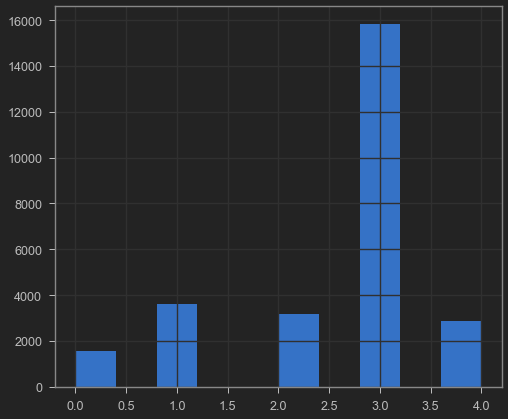

In [4]:
train.label.hist()
plt.show()

In [5]:
train.label.value_counts()

3    15816
1     3632
2     3159
4     2893
0     1553
Name: label, dtype: int64

# DataModule

In [6]:
from src import DataModule

In [64]:
size = 256

config = {
    'train_trans': {
        'RandomCrop': {
            'height': size,
            'width': size
        },
        'HorizontalFlip': {},
        'VerticalFlip': {}
    },
    'val_trans': {
        'CenterCrop': {
            'height': size,
            'width': size
        }
    }
}

dm = DataModule(file = 'train_extra.csv', **config)

dm.setup()

Training samples:  21642
Validation samples:  5411


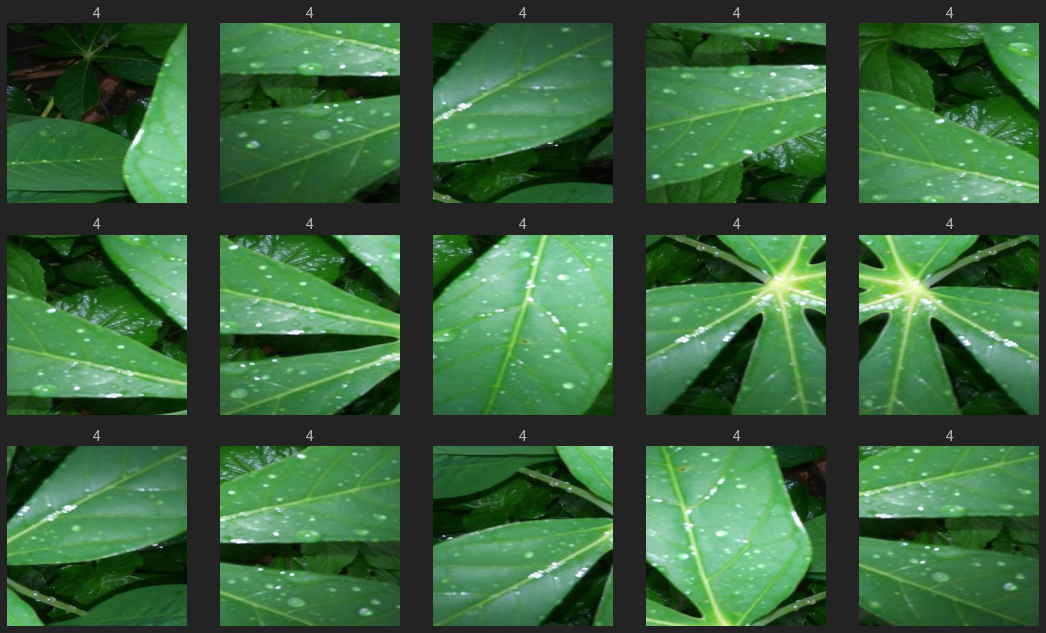

In [71]:
r, c = 3, 5
fig = plt.figure(figsize=(3*c, 3*r))
ds = dm.train_ds
ix = random.randint(0, len(ds)-1)
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        img, label = ds[ix]
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title(label.item())
plt.tight_layout()
plt.show()

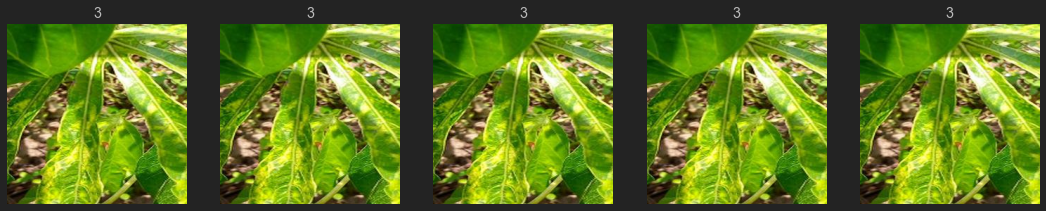

In [76]:
r, c = 1, 5
fig = plt.figure(figsize=(3*c, 3*r))
ds = dm.val_ds
ix = random.randint(0, len(ds)-1)
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        img, label = ds[ix]
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title(label.item())
plt.tight_layout()
plt.show()